<a href="https://colab.research.google.com/github/Jay5852/100-days-machine-learning-daily-practice/blob/main/linear_regression/polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,SGDRegressor

from sklearn.preprocessing import PolynomialFeatures,StandardScaler

from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline

In [2]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

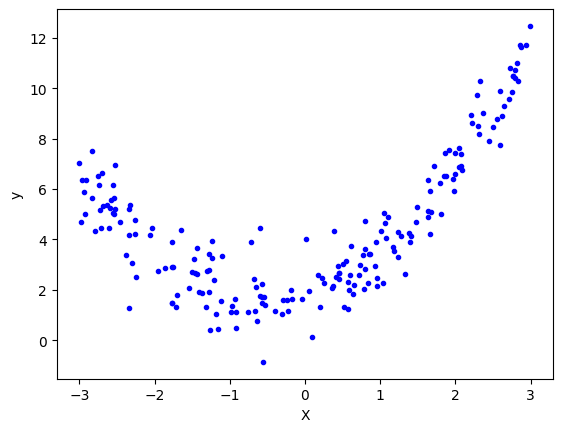

In [3]:
plt.plot(X, y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()


In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size=0.2,
                                                 random_state=2)

In [7]:
lr= LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [8]:
y_pred =lr.predict(X_test)

In [9]:
r2_score(y_test,y_pred)

0.1814881454407662

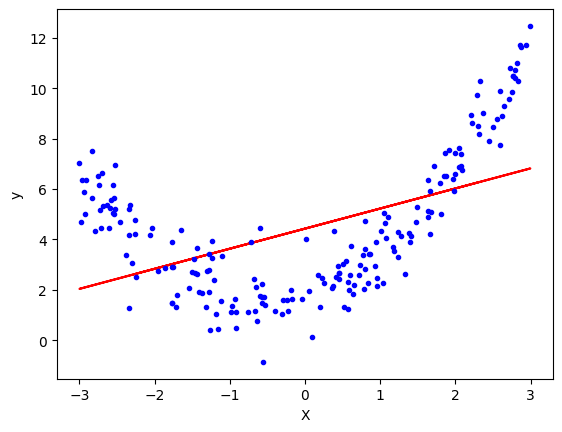

In [10]:
plt.plot(X_train,lr.predict(X_train),color ='r')
plt.plot(X,y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [23]:
#Applying Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_train_trf = poly.fit_transform(X_train)
X_test_trf = poly.transform(X_test)



In [24]:
X_test_trf

array([[ 1.        , -2.03695733,  4.14919518],
       [ 1.        , -2.82504924,  7.9809032 ],
       [ 1.        ,  0.95348101,  0.90912603],
       [ 1.        ,  0.78756756,  0.62026266],
       [ 1.        , -2.58603879,  6.68759664],
       [ 1.        ,  1.8012574 ,  3.24452822],
       [ 1.        ,  1.98382938,  3.935579  ],
       [ 1.        ,  1.01371116,  1.02761032],
       [ 1.        , -1.23058467,  1.51433864],
       [ 1.        , -2.54833089,  6.49399033],
       [ 1.        , -2.69169437,  7.24521859],
       [ 1.        , -1.25775459,  1.58194661],
       [ 1.        ,  0.95402558,  0.91016481],
       [ 1.        ,  0.84585421,  0.71546935],
       [ 1.        , -0.93159215,  0.86786393],
       [ 1.        ,  1.6724705 ,  2.79715756],
       [ 1.        ,  1.85223408,  3.43077108],
       [ 1.        ,  0.73391842,  0.53863624],
       [ 1.        , -0.71733372,  0.51456766],
       [ 1.        ,  1.71909814,  2.9552984 ],
       [ 1.        ,  0.36080484,  0.130

In [25]:
lr = LinearRegression()


In [26]:
lr.fit(X_train_trf,y_train)

LinearRegression()

In [27]:
y_pred = lr.predict(X_test_trf)

In [28]:
r2_score(y_test,y_pred)

0.8610738466866013

In [29]:
lr.coef_

array([[0.        , 0.90246585, 0.80934969]])

In [30]:
lr.intercept_

array([1.85452336])

In [31]:
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

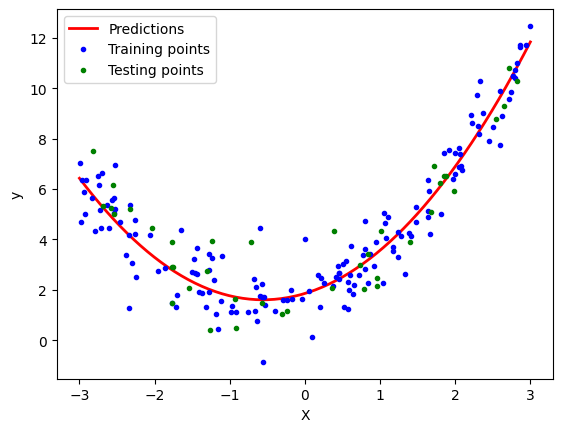

In [32]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


In [33]:
def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

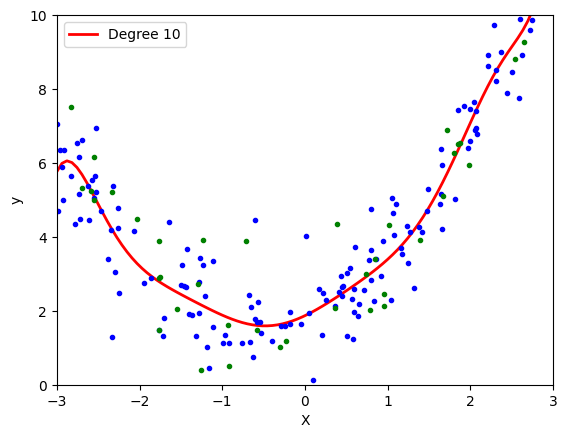

In [36]:
polynomial_regression(10)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


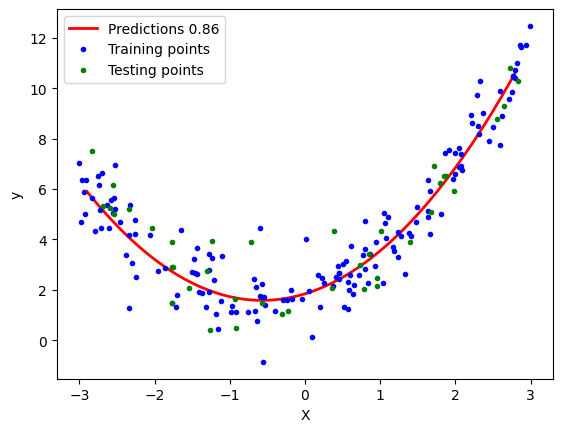

In [37]:
# Applying Gradient Descent

poly = PolynomialFeatures(degree=2)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

sgd = SGDRegressor(max_iter=100)
sgd.fit(X_train_trans,y_train)

X_new=np.linspace(-2.9, 2.8, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = sgd.predict(X_new_poly)

y_pred = sgd.predict(X_test_trans)

plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions " + str(round(r2_score(y_test,y_pred),2)))
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [48]:
# 3D polynomial regression
x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8

z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y +2 + np.random.randn(100, 1)
# z = x^2 + y^2 + 0.2x + 0.2y + 0.1xy + 2

In [49]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.show()

In [50]:
lr = LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)

x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)
xGrid, yGrid = np.meshgrid(x_input,y_input)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

z_final = lr.predict(final).reshape(10,10)

In [51]:
import plotly.graph_objects as go

fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final ))

fig.show()

In [52]:
X_multi = np.array([x,y]).reshape(100,2)
X_multi.shape

(100, 2)

In [53]:
poly = PolynomialFeatures(degree=2)
X_multi_trans = poly.fit_transform(X_multi)

In [55]:
print("Input",poly.n_features_in_)
print("Ouput",poly.n_output_features_)
print("Powers\n",poly.powers_)

Input 2
Ouput 6
Powers
 [[0 0]
 [1 0]
 [0 1]
 [2 0]
 [1 1]
 [0 2]]


In [56]:
X_multi_trans.shape

(100, 6)

In [57]:
lr = LinearRegression()
lr.fit(X_multi_trans,z)

LinearRegression()

In [58]:
X_test_multi = poly.transform(final)

In [59]:
z_final = lr.predict(X_multi_trans).reshape(10,10)

In [60]:
fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final))

fig.update_layout(scene = dict(zaxis = dict(range=[0,35])))

fig.show()